In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dropout
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error , mean_absolute_percentage_error , mean_squared_error

In [ ]:

data = pd.read_csv("/content/weatherAUS.csv - weatherAUS.csv.csv")
df=data.copy()

In [ ]:
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [ ]:
data.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [ ]:
data.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

In [ ]:
data['Date'] = pd.to_datetime(data['Date'])

In [ ]:
data['Date'] 

0        2008-12-01
1        2008-12-02
2        2008-12-03
3        2008-12-04
4        2008-12-05
            ...    
145455   2017-06-21
145456   2017-06-22
145457   2017-06-23
145458   2017-06-24
145459   2017-06-25
Name: Date, Length: 145460, dtype: datetime64[ns]

In [ ]:
data['year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['day'] = data['Date'].dt.day

In [ ]:
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,year,Month,day
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,1007.1,8.0,NaN,16.9,21.8,No,No,2008,12,1
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,1007.8,NaN,NaN,17.2,24.3,No,No,2008,12,2
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,1008.7,NaN,2.0,21.0,23.2,No,No,2008,12,3
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,1012.8,NaN,NaN,18.1,26.5,No,No,2008,12,4
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,1006.0,7.0,8.0,17.8,29.7,No,No,2008,12,5


In [ ]:
data.drop('Date',axis=1,inplace=True)

In [ ]:
data.columns

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow', 'year', 'Month', 'day'],
      dtype='object')

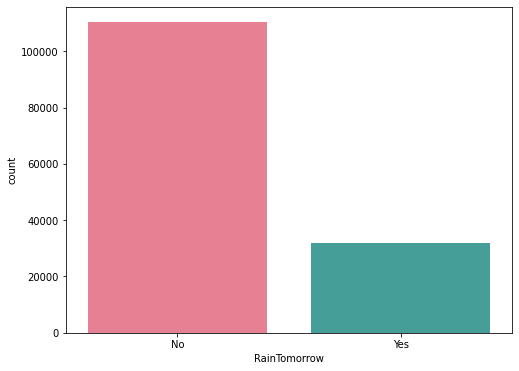

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(data['RainTomorrow'],palette='husl');

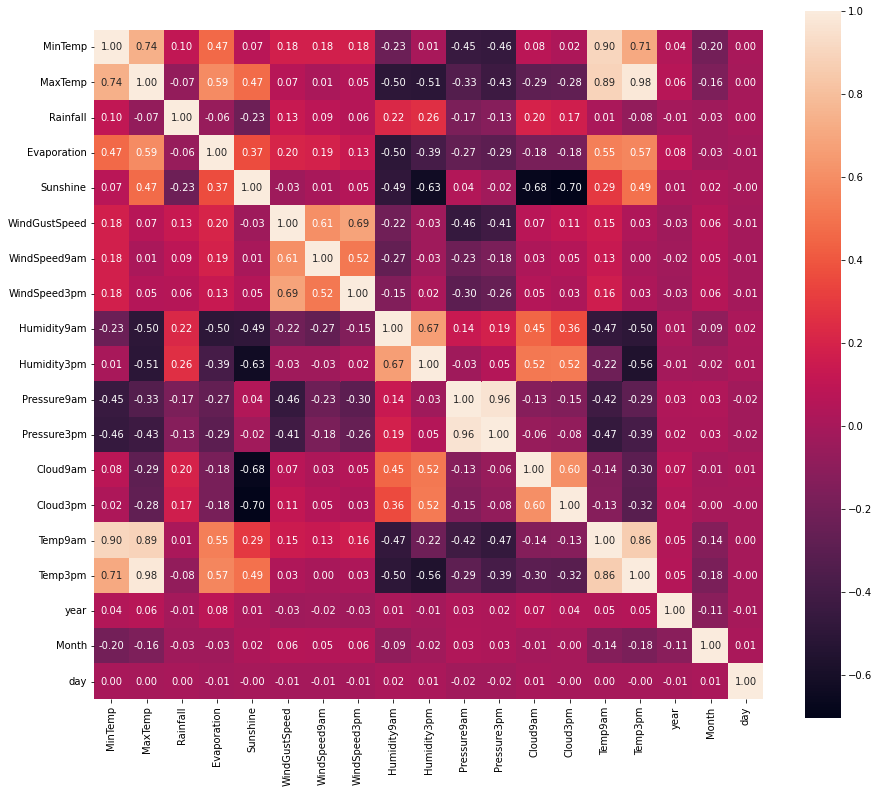

In [ ]:
plt.figure(figsize=(15,13))
ax = sns.heatmap(data.corr(), square=True, annot=True, fmt='.2f')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)          
plt.show()

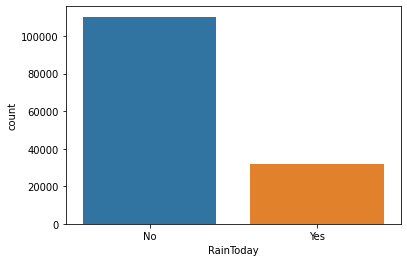

In [ ]:
sns.countplot(data['RainToday'])

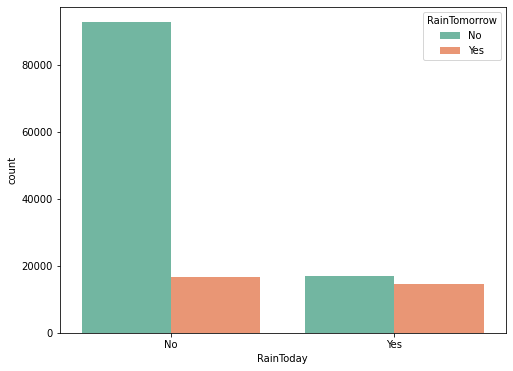

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(data['RainToday'], hue=data['RainTomorrow'],palette='Set2');

In [ ]:
x=pd.crosstab(data['RainTomorrow'],data['RainToday'])
x

RainToday,No,Yes
RainTomorrow,,
No,92728,16858
Yes,16604,14597


In [ ]:
y=x/x.transpose().sum().values.reshape(2,1)*100
y

RainToday,No,Yes
RainTomorrow,,
No,84.616648,15.383352
Yes,53.216243,46.783757


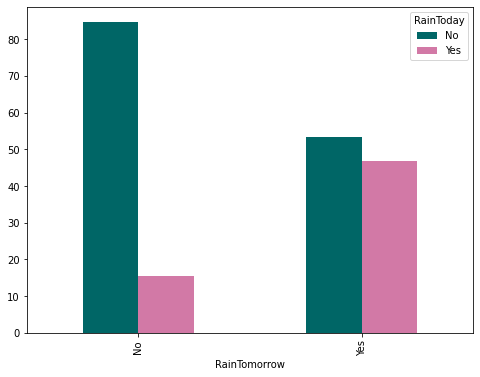

In [ ]:
y.plot(kind="bar",figsize=(8,6),color=['#006666','#d279a6']);

In [ ]:
x=pd.crosstab(data['Location'],data['RainToday']) 
x

RainToday,No,Yes
Location,,
Adelaide,2402,689
Albany,2114,902
Albury,2394,617
AliceSprings,2788,244
BadgerysCreek,2345,583
Ballarat,2247,781
Bendigo,2472,562
Brisbane,2452,709
Cairns,2038,950


In [ ]:
y=x/x.transpose().sum().values.reshape((-1, 1))*100
y

RainToday,No,Yes
Location,,
Adelaide,77.709479,22.290521
Albany,70.092838,29.907162
Albury,79.508469,20.491531
AliceSprings,91.952507,8.047493
BadgerysCreek,80.088798,19.911202
Ballarat,74.207398,25.792602
Bendigo,81.476599,18.523401
Brisbane,77.570389,22.429611
Cairns,68.206158,31.793842


In [ ]:
y=y.sort_values(by='Yes',ascending=True )
y

RainToday,No,Yes
Location,,
Woomera,93.246406,6.753594
Uluru,92.378449,7.621551
AliceSprings,91.952507,8.047493
Mildura,89.125374,10.874626
Cobar,87.081660,12.918340
Moree,86.194814,13.805186
Nhil,84.576163,15.423837
SalmonGums,84.027073,15.972927
Katherine,83.012821,16.987179


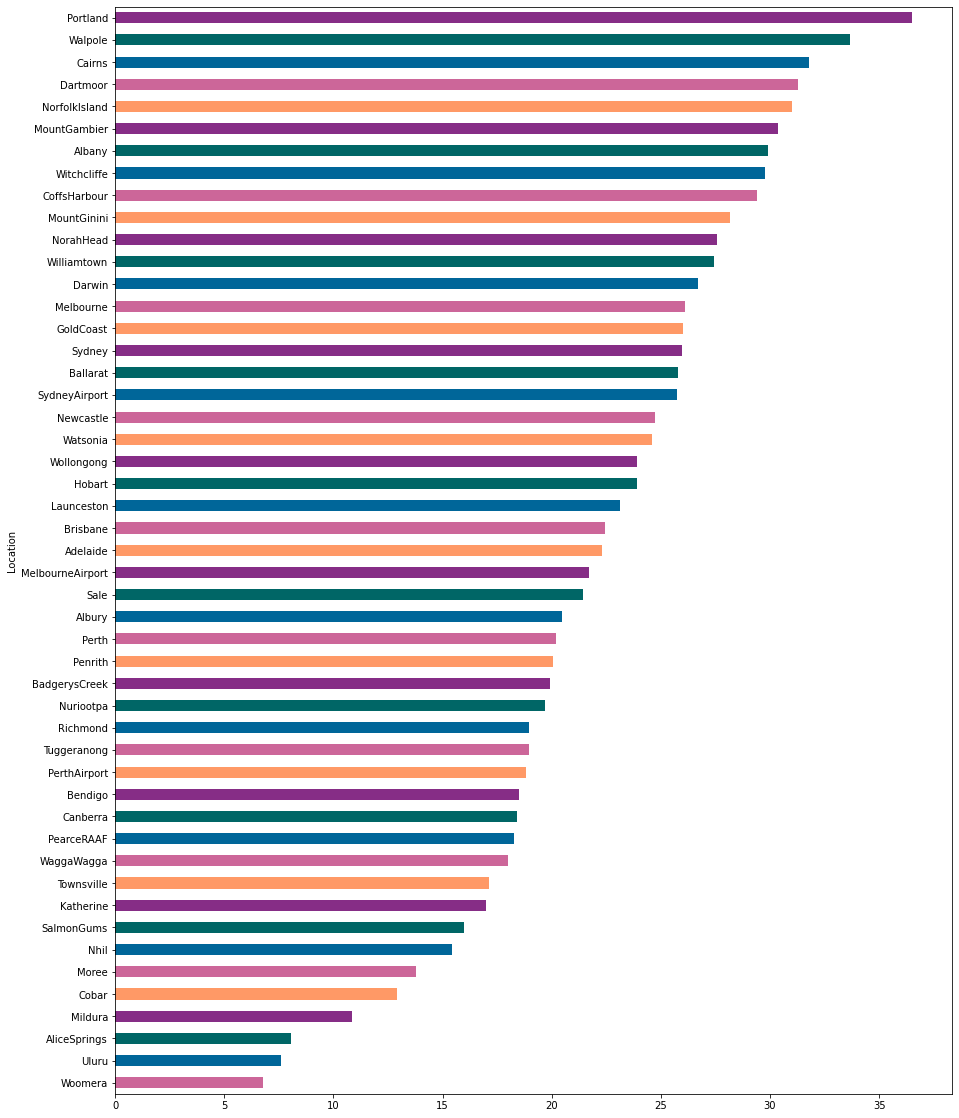

In [ ]:
color=['#cc6699','#006699','#006666','#862d86','#ff9966'  ]
y.Yes.plot(kind="barh",figsize=(15,20),color=color);

In [ ]:
data.columns

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow', 'year', 'Month', 'day'],
      dtype='object')

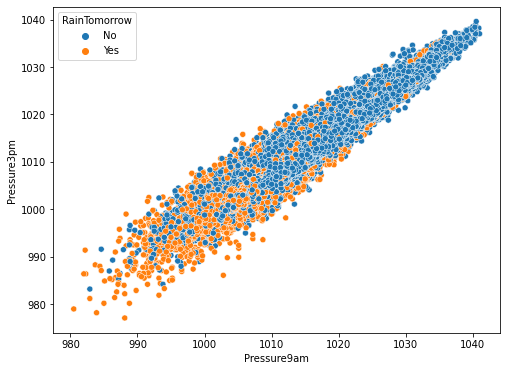

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=data,x='Pressure9am',y='Pressure3pm',hue='RainTomorrow');

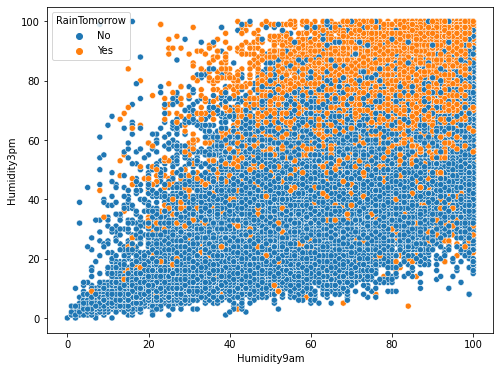

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=data,x='Humidity9am',y='Humidity3pm',hue='RainTomorrow');

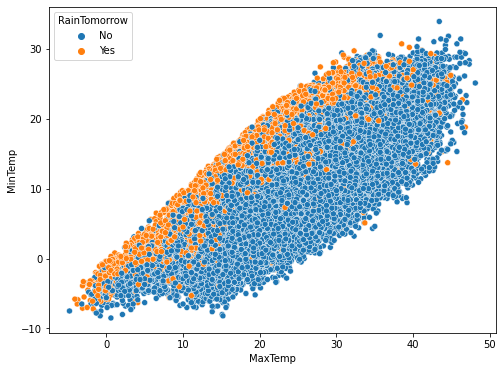

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='MaxTemp', y='MinTemp', data=data, hue='RainTomorrow');

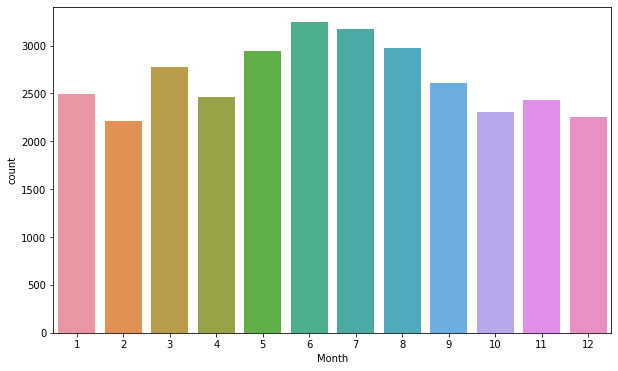

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(data=data[data['RainTomorrow']=='Yes'],x='Month');

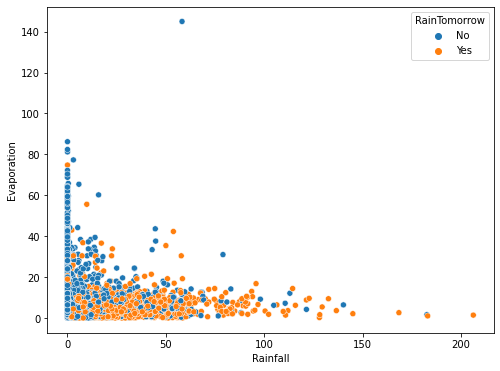

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=data,x='Rainfall',y='Evaporation',hue='RainTomorrow');

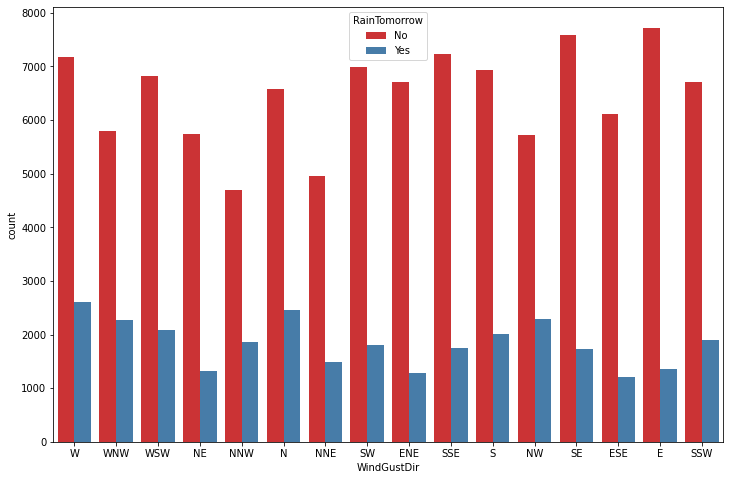

In [ ]:
plt.figure(figsize=(12,8))
sns.countplot(data=data,x='WindGustDir',hue='RainTomorrow',palette='Set1');

In [ ]:
# percentage of missing data in each column
data.isnull().sum()/data.shape[0]*100

Location          0.000000
MinTemp           1.020899
MaxTemp           0.866905
Rainfall          2.241853
Evaporation      43.166506
Sunshine         48.009762
WindGustDir       7.098859
WindGustSpeed     7.055548
WindDir9am        7.263853
WindDir3pm        2.906641
WindSpeed9am      1.214767
WindSpeed3pm      2.105046
Humidity9am       1.824557
Humidity3pm       3.098446
Pressure9am      10.356799
Pressure3pm      10.331363
Cloud9am         38.421559
Cloud3pm         40.807095
Temp9am           1.214767
Temp3pm           2.481094
RainToday         2.241853
RainTomorrow      2.245978
year              0.000000
Month             0.000000
day               0.000000
dtype: float64

In [ ]:
# filling feature with large percentage of missing data using random choice 
lst=['Evaporation','Sunshine','Cloud9am','Cloud3pm']
for col in lst:
    fill_list = data[col].dropna()
    data[col] = data[col].fillna(pd.Series(
        np.random.choice(fill_list , size = len(data.index))))
#categorical features
s = (data.dtypes == "object")
object_cols = list(s[s].index)

In [ ]:
for i in object_cols:
    data[i].fillna(data[i].mode()[0], inplace=True)

In [ ]:
t = (data.dtypes == "float64")
num_cols = list(t[t].index)

In [ ]:
for i in num_cols:
    data[i].fillna(data[i].median(), inplace=True)

In [ ]:
data.isnull().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
year             0
Month            0
day              0
dtype: int64

In [ ]:
num_cols

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm']

MinTemp


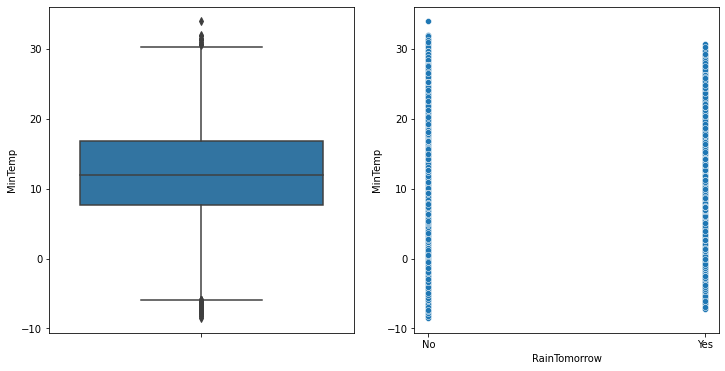

MaxTemp


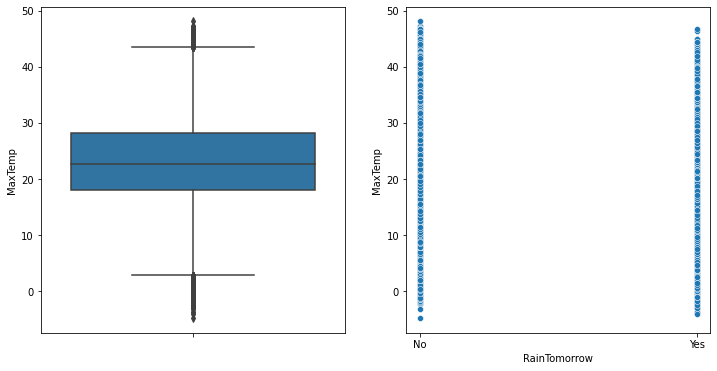

Rainfall


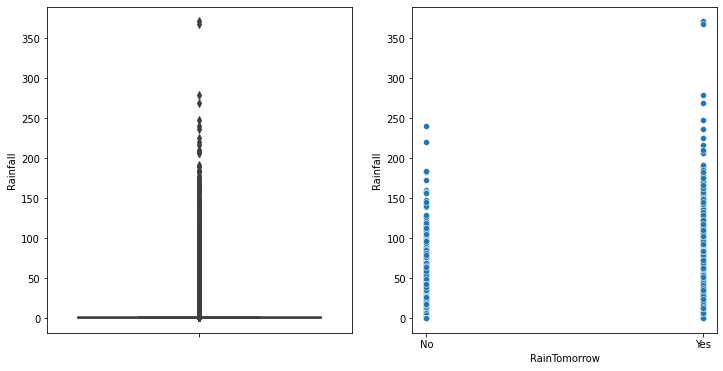

Evaporation


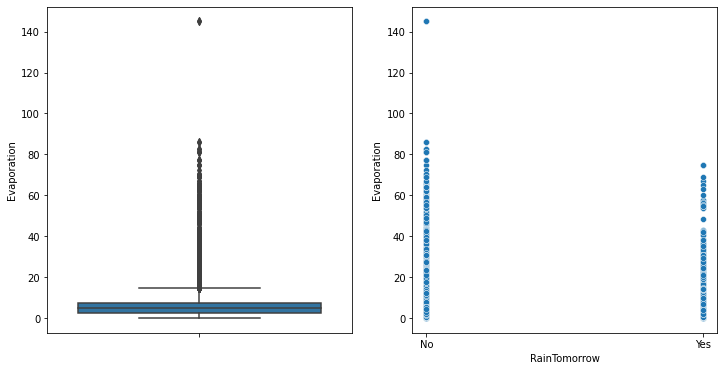

Sunshine


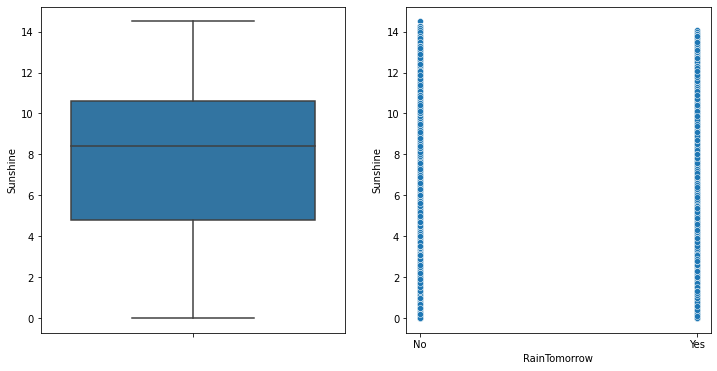

WindGustSpeed


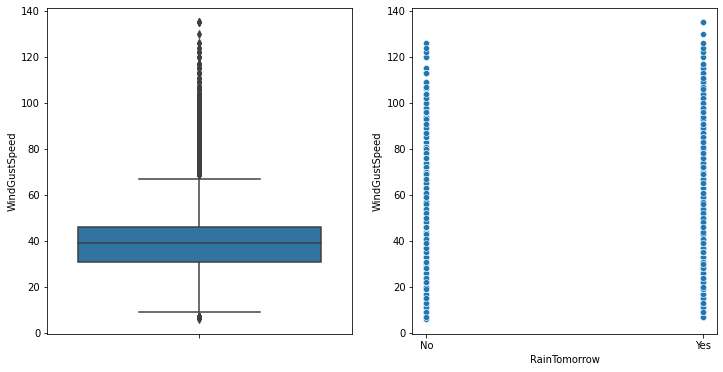

WindSpeed9am


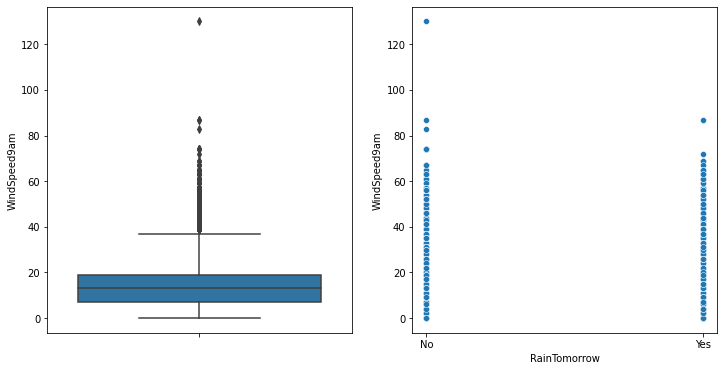

WindSpeed3pm


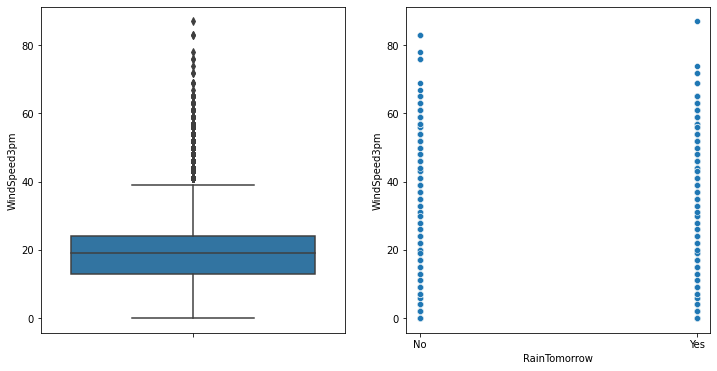

Humidity9am


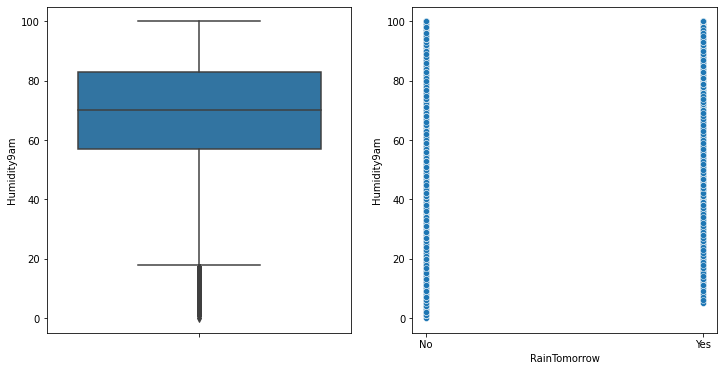

Humidity3pm


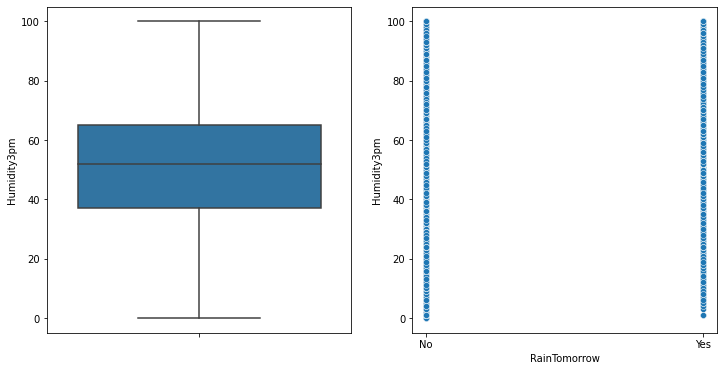

Pressure9am


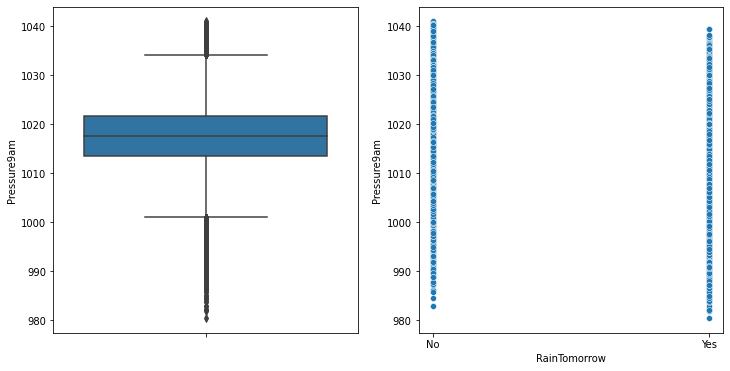

Pressure3pm


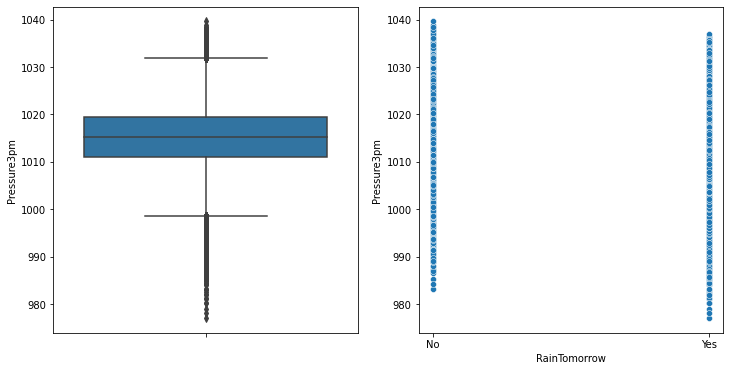

Cloud9am


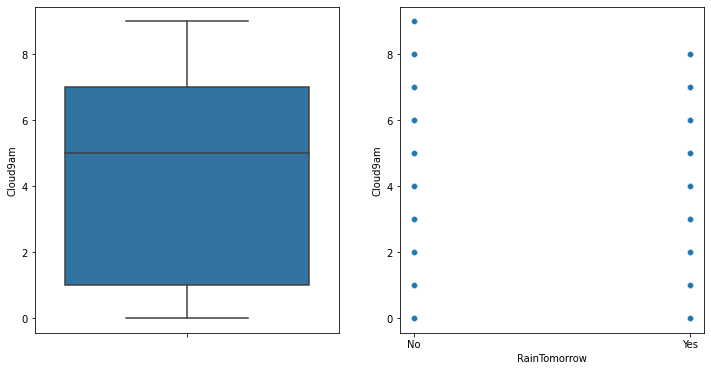

Cloud3pm


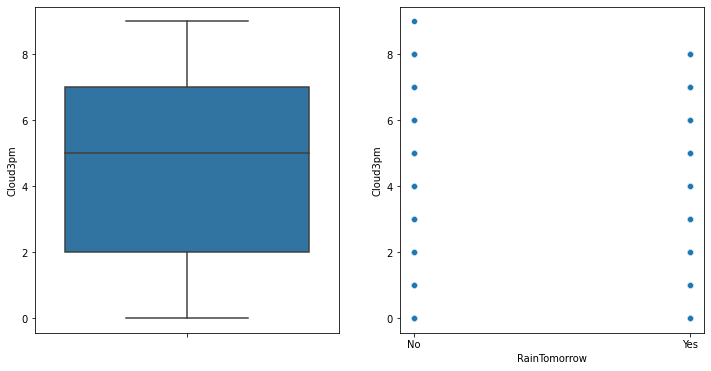

Temp9am


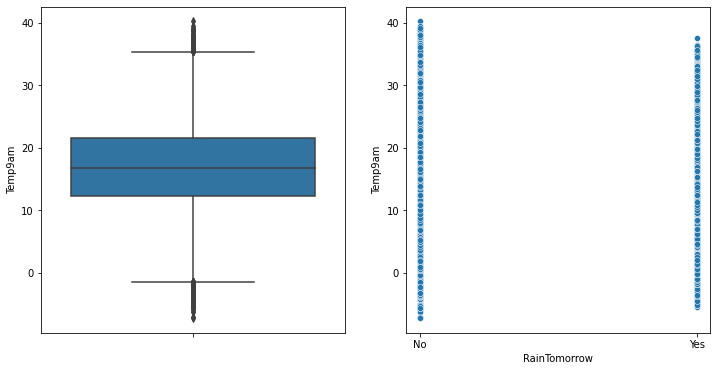

Temp3pm


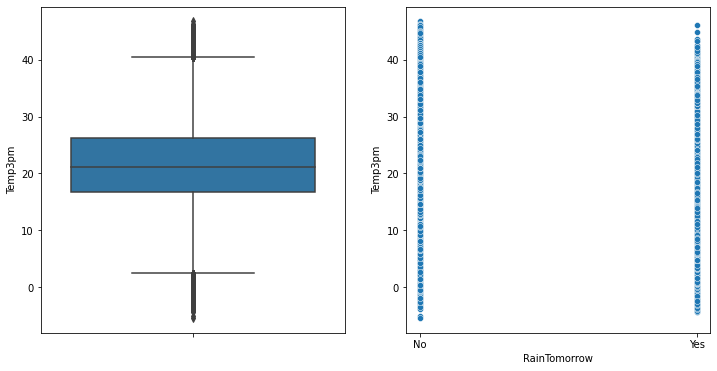

In [ ]:
for col in num_cols:
  print(col)
  plt.figure(figsize = (12,6))
  plt.subplot(1, 2, 1)
  sns.boxplot(data=data,y=col)
  plt.subplot(1, 2, 2)
  sns.scatterplot(data=data,x='RainTomorrow',y=col)
  plt.show()

In [ ]:
x=data.loc[(data['MinTemp']>30)|(data['MinTemp']<-6)]
print('NO. of outliers =',x.shape[0],'\npercentage of the outliers =',str(round(x.shape[0]/data.shape[0]*100,2))+'%')
data=data.loc[(data['MinTemp']<=30)&(data['MinTemp']>=-6)]

NO. of outliers = 76 
percentage of the outliers = 0.05%


In [ ]:
x=data.loc[(data['MaxTemp']>45)|(data['MaxTemp']<1)]
print('NO. of outliers =',x.shape[0],'\npercentage of the outliers =',str(round(x.shape[0]/data.shape[0]*100,2))+'%')
data=data.loc[(data['MaxTemp']<=45)&(data['MaxTemp']>=1)]

NO. of outliers = 215 
percentage of the outliers = 0.15%


In [ ]:
x=data.loc[data['Rainfall']>55]
print('NO. of outliers =',x.shape[0],'\npercentage of the outliers =',str(round(x.shape[0]/data.shape[0]*100,2))+'%')
data=data.loc[data['Rainfall']<=55]

NO. of outliers = 647 
percentage of the outliers = 0.45%


In [ ]:
x=data.loc[(data['Evaporation']>30)]
print('NO. of outliers =',x.shape[0],'\npercentage of the outliers =',str(round(x.shape[0]/data.shape[0]*100,2))+'%')
data=data.loc[(data['Evaporation']<=30)]

NO. of outliers = 384 
percentage of the outliers = 0.27%


In [ ]:
x=data.loc[data['WindGustSpeed']>=80]
print('NO. of outliers =',x.shape[0],'\npercentage of the outliers =',str(round(x.shape[0]/data.shape[0]*100,2))+'%')
data=data.loc[data['WindGustSpeed']<80]

NO. of outliers = 1635 
percentage of the outliers = 1.13%


In [ ]:
x=data.loc[data['WindSpeed9am']>40]
print('NO. of outliers =',x.shape[0],'\npercentage of the outliers =',str(round(x.shape[0]/data.shape[0]*100,2))+'%')
data=data.loc[data['WindSpeed9am']<=40]

NO. of outliers = 971 
percentage of the outliers = 0.68%


In [ ]:
x=data.loc[data['WindSpeed3pm']>45]
print('NO. of outliers =',x.shape[0],'\npercentage of the outliers =',str(round(x.shape[0]/data.shape[0]*100,2))+'%')
data=data.loc[data['WindSpeed3pm']<=45]

NO. of outliers = 447 
percentage of the outliers = 0.32%


In [ ]:
x=data.loc[data['Humidity9am']<=19]
print('NO. of outliers =',x.shape[0],'\npercentage of the outliers =',str(round(x.shape[0]/data.shape[0]*100,2))+'%')
data=data.loc[data['Humidity9am']>19]

NO. of outliers = 1706 
percentage of the outliers = 1.21%


In [ ]:
x=data.loc[(data['Pressure9am']>1035)  |  (data['Pressure9am'] <1000)]
print('NO. of outliers =',x.shape[0],'\npercentage of the outliers =',str(round(x.shape[0]/data.shape[0]*100,2))+'%')
data=data.loc[(data['Pressure9am']<=1035)  &  (data['Pressure9am'] >=1000)]

NO. of outliers = 1662 
percentage of the outliers = 1.19%


In [ ]:
x=data.loc[(data['Pressure3pm']>1032)  |  (data['Pressure3pm'] <1000)]
print('NO. of outliers =',x.shape[0],'\npercentage of the outliers =',str(round(x.shape[0]/data.shape[0]*100,2))+'%')
data=data.loc[(data['Pressure3pm']<=1032)  &  (data['Pressure3pm'] >=1000)]

NO. of outliers = 1146 
percentage of the outliers = 0.83%


In [ ]:
x=data.loc[(data['Temp9am']>=35) | (data['Temp9am']<=0)]
print('NO. of outliers =',x.shape[0],'\npercentage of the outliers =',str(round(x.shape[0]/data.shape[0]*100,2))+'%')
data=data.loc[(data['Temp9am']<35) & (data['Temp9am']>0)]

NO. of outliers = 334 
percentage of the outliers = 0.24%


In [ ]:
x=data.loc[(data['Temp3pm']>40) | (data['Temp3pm']<=0)]
print('NO. of outliers =',x.shape[0],'\npercentage of the outliers =',str(round(x.shape[0]/data.shape[0]*100,2))+'%')
data=data.loc[(data['Temp3pm']<=40) & (data['Temp3pm']>0)]

NO. of outliers = 363 
percentage of the outliers = 0.27%


MinTemp


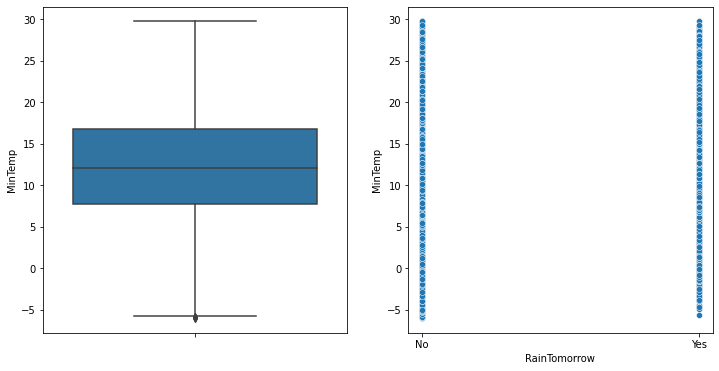

MaxTemp


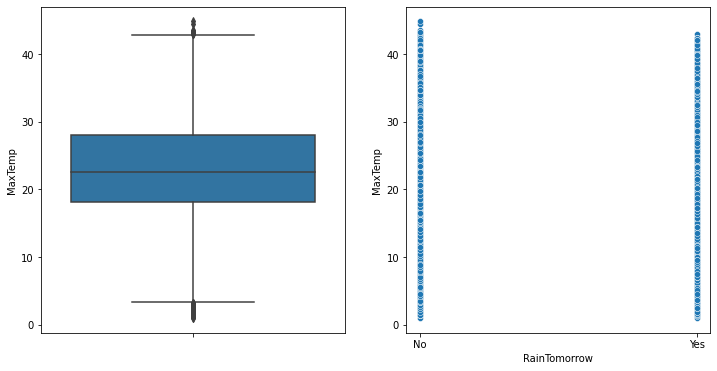

Rainfall


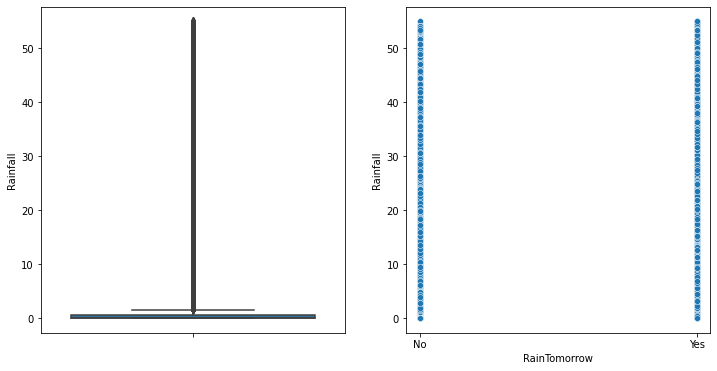

Evaporation


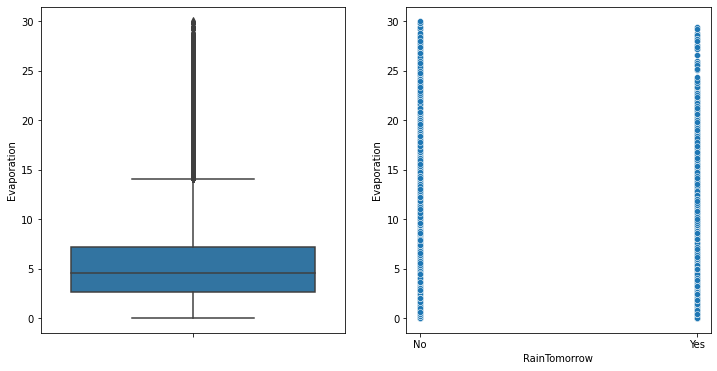

Sunshine


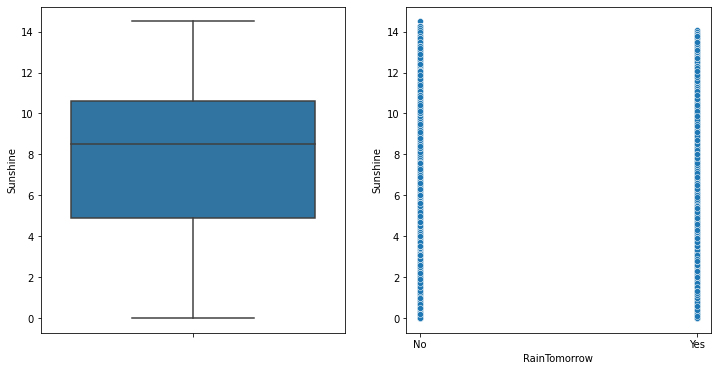

WindGustSpeed


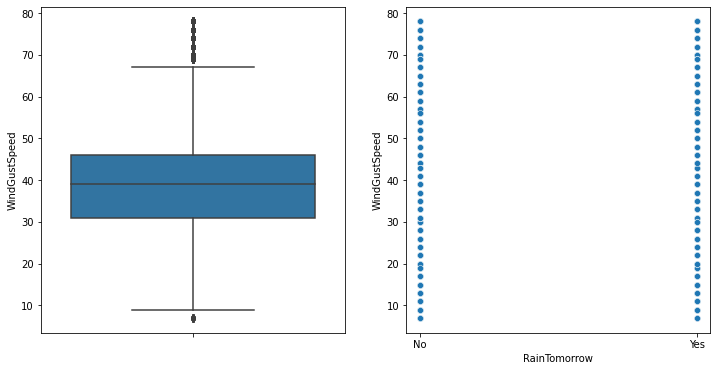

WindSpeed9am


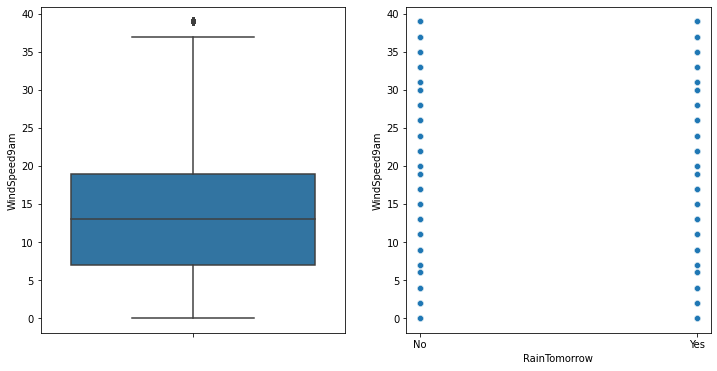

WindSpeed3pm


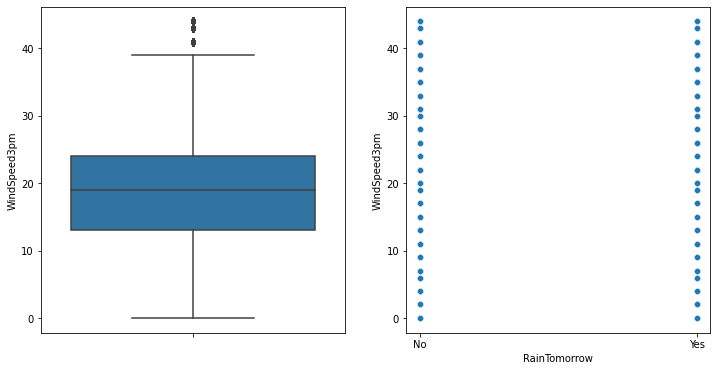

Humidity9am


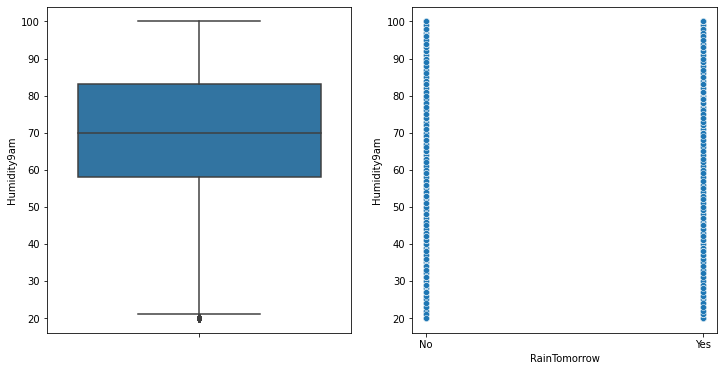

Humidity3pm


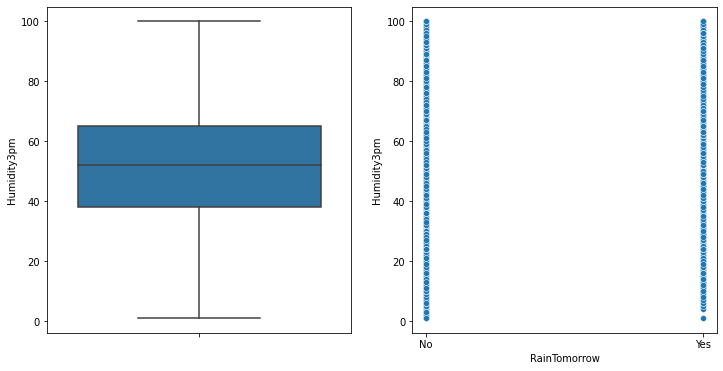

Pressure9am


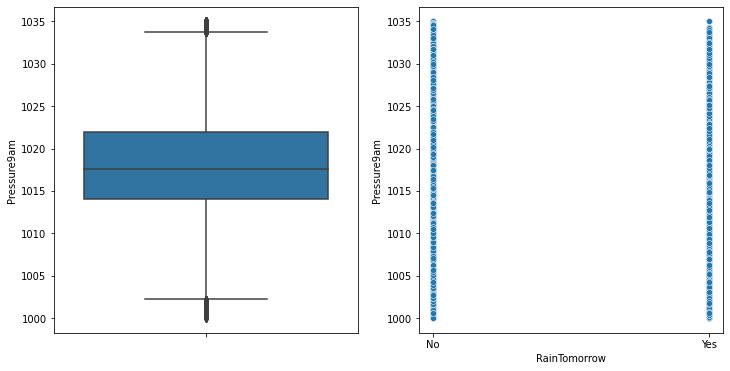

Pressure3pm


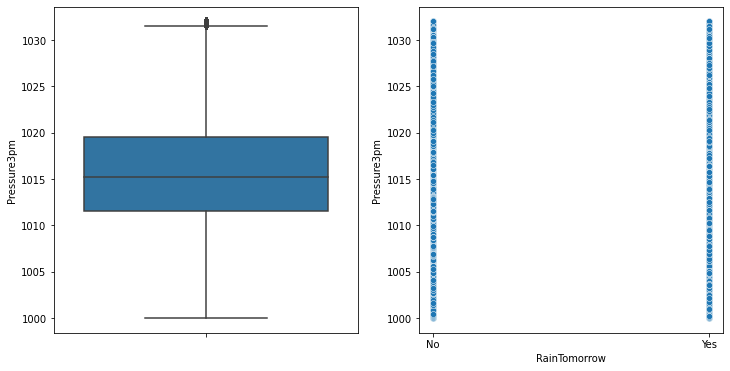

Cloud9am


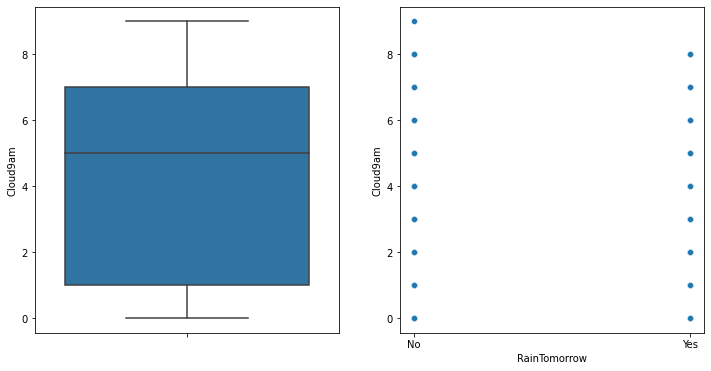

Cloud3pm


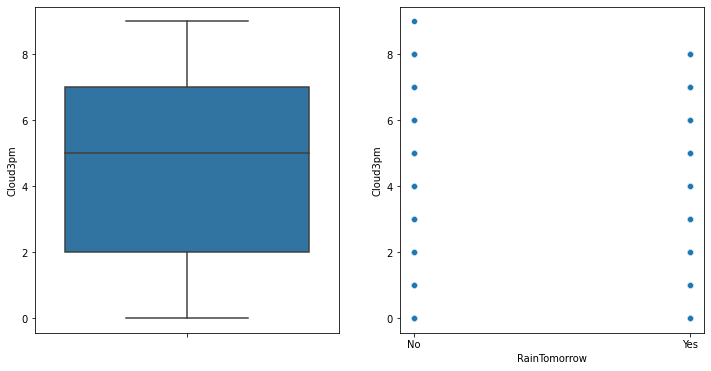

Temp9am


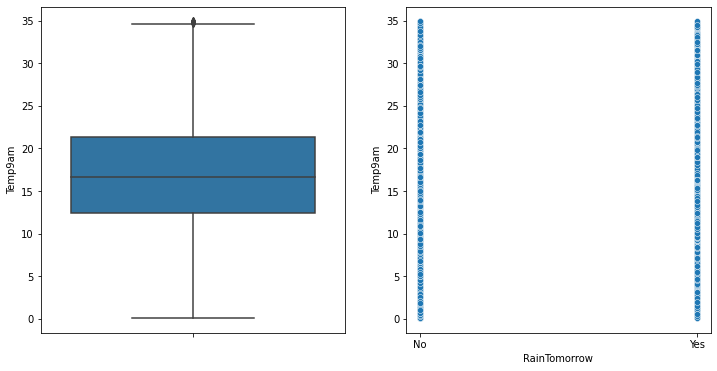

Temp3pm


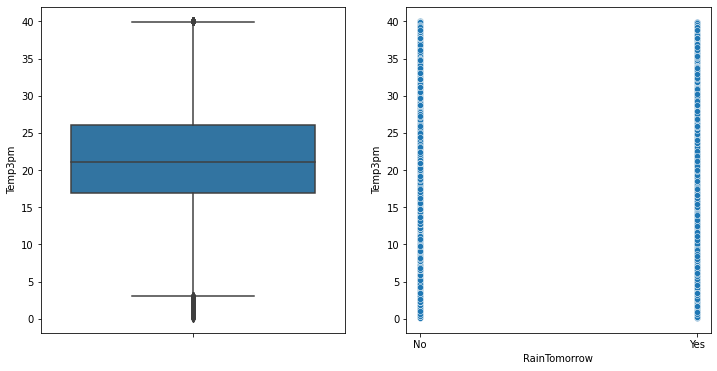

In [ ]:
for col in num_cols:
  print(col)
  plt.figure(figsize = (12,6))
  plt.subplot(1, 2, 1)
  sns.boxplot(data=data,y=col)
  plt.subplot(1, 2, 2)
  sns.scatterplot(data=data,x='RainTomorrow',y=col)
  plt.show()

In [ ]:
data.shape

(135874, 25)

In [ ]:
data.columns

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow', 'year', 'Month', 'day'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for i in object_cols:
    data[i] = label_encoder.fit_transform(data[i])

In [ ]:
X = data.drop(['RainTomorrow','day'],axis=1)
y = data['RainTomorrow']
X.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,year,Month
0,2,13.4,22.9,0.6,5.2,13.7,13,44.0,13,14,...,22.0,1007.7,1007.1,8.0,2.0,16.9,21.8,0,2008,12
1,2,7.4,25.1,0.0,5.6,13.2,14,44.0,6,15,...,25.0,1010.6,1007.8,1.0,7.0,17.2,24.3,0,2008,12
2,2,12.9,25.7,0.0,1.2,10.5,15,46.0,13,15,...,30.0,1007.6,1008.7,0.0,2.0,21.0,23.2,0,2008,12
3,2,9.2,28.0,0.0,14.2,2.7,4,24.0,9,0,...,16.0,1017.6,1012.8,2.0,7.0,18.1,26.5,0,2008,12
4,2,17.5,32.3,1.0,8.0,2.3,13,41.0,1,7,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0,2008,12


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=101)
X.columns

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'year', 'Month'],
      dtype='object')

In [ ]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train =pd.DataFrame(scaler.transform(X_train),columns=X_train.columns)
X_test = scaler.transform(X_test)
X_train.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,year,Month
0,0.520833,0.649860,0.562212,0.0,0.113333,0.013986,0.866667,0.478873,0.466667,0.866667,...,0.373737,0.388571,0.375000,0.111111,0.333333,0.629310,0.606516,0.0,0.6,0.272727
1,0.875000,0.523810,0.764977,0.0,0.353333,0.741259,0.466667,0.422535,0.066667,0.933333,...,0.111111,0.357143,0.318750,0.111111,0.777778,0.663793,0.832080,0.0,0.7,0.909091
2,0.145833,0.540616,0.474654,0.0,0.206667,0.132867,0.600000,0.394366,0.800000,0.133333,...,0.666667,0.862857,0.868750,0.777778,0.777778,0.548851,0.488722,0.0,0.8,0.727273
3,0.812500,0.868347,0.739631,0.0,0.320000,0.643357,0.200000,0.394366,0.200000,0.200000,...,0.434343,0.365714,0.246875,0.666667,0.111111,0.839080,0.779449,0.0,0.8,0.909091
4,0.208333,0.478992,0.541475,0.0,0.120000,0.118881,0.666667,0.211268,0.266667,0.733333,...,0.424242,0.597143,0.534375,0.222222,0.222222,0.494253,0.593985,0.0,0.9,0.363636


In [ ]:
from tensorflow.keras.optimizers import Adam
from keras import regularizers
model = Sequential()

model.add(Dense(units=24,activation='tanh',))

# model.add(Dropout(0.2))

model.add(Dense(units=18,activation='tanh',kernel_regularizer=regularizers.l2(0.0001)))

# model.add(Dropout(0.2))

model.add(Dense(units=23,activation='tanh',kernel_regularizer=regularizers.l2(0.003)))

model.add(Dropout(0.5))

model.add(Dense(units=12,activation='tanh'))

model.add(Dropout(0.2))

model.add(Dense(units=1,activation='sigmoid'))


# For a binary classification problem
opt = Adam(learning_rate=0.001)
model.compile(loss='binary_crossentropy', optimizer=opt)


In [ ]:
early_stop = EarlyStopping(monitor='val_loss', mode='min',min_delta=0.001, verbose=1, patience=25,restore_best_weights=True)

In [ ]:
model.fit(x=X_train, 
          y=y_train, 
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop],
          epochs = 150,
          batch_size = 32
)

Epoch 1/150
3185/3185 [==============================] - 9s 3ms/step - loss: 0.4084 - val_loss: 0.3784
Epoch 2/150
3185/3185 [==============================] - 8s 2ms/step - loss: 0.3802 - val_loss: 0.3696
Epoch 3/150
3185/3185 [==============================] - 10s 3ms/step - loss: 0.3770 - val_loss: 0.3676
Epoch 4/150
3185/3185 [==============================] - 8s 2ms/step - loss: 0.3733 - val_loss: 0.3663
Epoch 5/150
3185/3185 [==============================] - 8s 2ms/step - loss: 0.3721 - val_loss: 0.3669
Epoch 6/150
3185/3185 [==============================] - 8s 2ms/step - loss: 0.3701 - val_loss: 0.3652
Epoch 7/150
3185/3185 [==============================] - 8s 2ms/step - loss: 0.3697 - val_loss: 0.3657
Epoch 8/150
3185/3185 [==============================] - 8s 2ms/step - loss: 0.3687 - val_loss: 0.3623
Epoch 9/150
3185/3185 [==============================] - 8s 3ms/step - loss: 0.3680 - val_loss: 0.3663
Epoch 10/150
3185/3185 [==============================] - 9s 3ms/step - 